In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

filename_train = 'C:/Users/edgar/DRAE/NEU/ALIGN/CS6140_Machine_Learning/Final_Project/runs/train.csv'
filename_test = 'C:/Users/edgar/DRAE/NEU/ALIGN/CS6140_Machine_Learning/Final_Project/runs/test.csv'
train_df = pd.read_csv(filename_train)
test_df = pd.read_csv(filename_test)

airplane_full_df = pd.concat([train_df, test_df], ignore_index=True)
airplane_full_df.drop(labels=["Unnamed: 0", "id"], axis=1, inplace=True)

In [2]:
airplane_full_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
airplane_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [4]:
airplane_full_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
airplane_full_df.shape

(129880, 23)

In [6]:
# check for empty cells
airplane_full_df.isnull().values.any()

True

In [7]:
# returns the rows and column of empty value - only on column 21('Arrival Delay in Minutes')
np.where(pd.isnull(airplane_full_df))

(array([   213,   1124,   1529,   2004,   2108,   2485,   2630,   3621,
          4041,   4490,   4588,   4688,   4897,   5295,   5296,   5496,
          6947,   7225,   8035,   8421,   8933,   9060,   9481,   9531,
          9551,   9940,  10634,  10880,  12036,  12689,  12808,  13501,
         14185,  14301,  15223,  15371,  15683,  15860,  16132,  16329,
         16503,  16881,  17234,  17808,  18429,  18620,  18724,  18796,
         18871,  19498,  19971,  20049,  20665,  21453,  21794,  22202,
         22840,  22939,  22986,  23033,  23505,  24180,  26131,  26310,
         26338,  26605,  26913,  27135,  27238,  27261,  27279,  27618,
         27819,  27904,  27916,  27992,  28352,  28494,  28959,  29486,
         29918,  30504,  30529,  32197,  32558,  32864,  32916,  33056,
         33059,  33271,  33470,  33870,  33937,  34140,  34464,  34677,
         34727,  34837,  34841,  35248,  35267,  35271,  35309,  35340,
         35501,  35892,  35959,  36064,  36319,  36535,  37095, 

In [8]:
# fill NaN with average values of the column
airplane_full_df.fillna(airplane_full_df['Arrival Delay in Minutes'].median(), inplace=True)
np.where(pd.isnull(airplane_full_df))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
# change data type of these columns to categorical
airplane_full_df['Gender'] = airplane_full_df['Gender'].astype('category')
airplane_full_df['Customer Type'] = airplane_full_df['Customer Type'].astype('category')
airplane_full_df['Type of Travel'] = airplane_full_df['Type of Travel'].astype('category')
airplane_full_df['Class'] = airplane_full_df['Class'].astype('category')
airplane_full_df['satisfaction'] = airplane_full_df['satisfaction'].astype('category')

In [10]:
# select all columns that are categorical
cat_columns = airplane_full_df.select_dtypes(['category']).columns
# female - 0, male - 1
# loyal customer - 0, disloyal customer - 1
# business travel - 0, personal travel - 1
# Business - 0, Eco - 1, Eco Plus - 2 
# neutra or dissatisfied - 0, satisfied - 1

In [11]:
# change all categorical columns to categorical integer values
airplane_full_df[cat_columns] = airplane_full_df[cat_columns].apply(lambda x: x.cat.codes)

In [12]:
airplane_full_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [13]:
airplane_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int8   
 1   Customer Type                      129880 non-null  int8   
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int8   
 4   Class                              129880 non-null  int8   
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

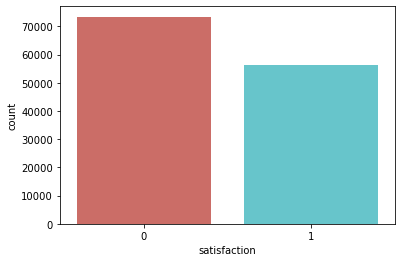

In [14]:
sb.countplot(x='satisfaction', data=airplane_full_df, palette='hls')

<AxesSubplot:>

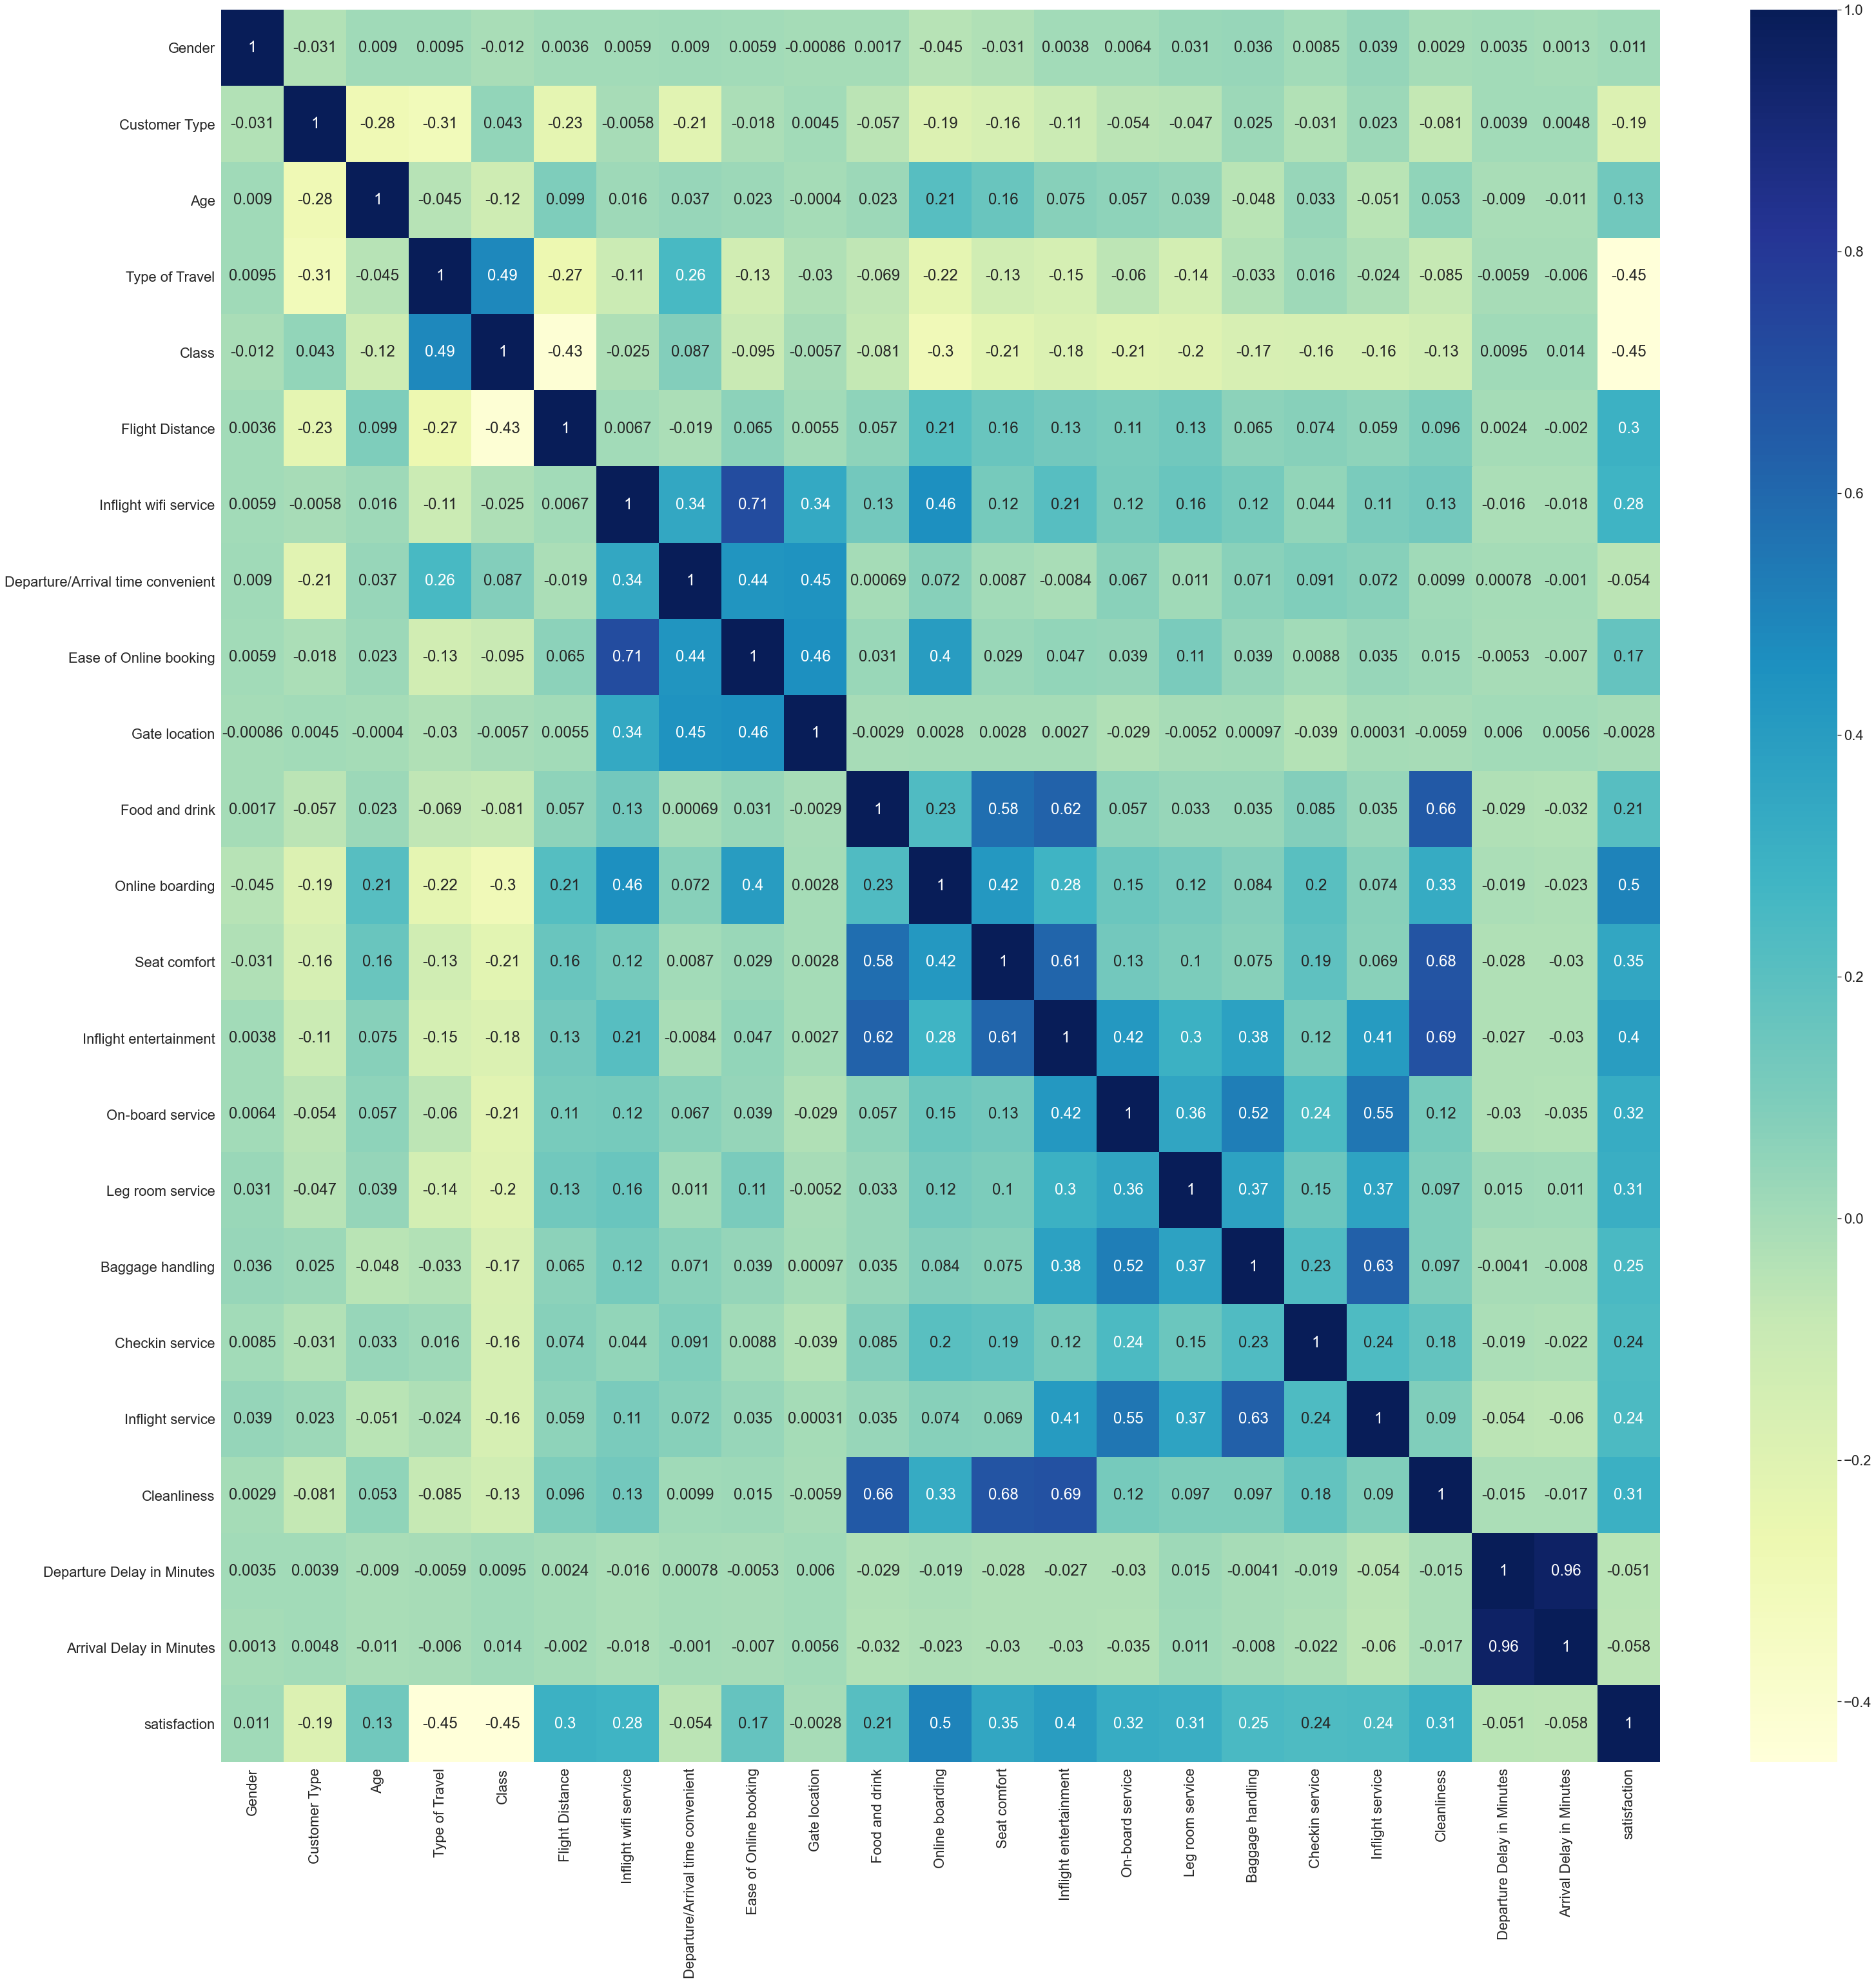

In [16]:
plt.subplots(figsize=(50,50))
sb.set(font_scale=2)
sb.heatmap(airplane_full_df.corr(), annot=True, cmap="YlGnBu")

In [17]:
# split data in 80-20 train-validation sets
df_class_y = airplane_full_df["satisfaction"]
airplane_full_df_features = airplane_full_df.drop(labels=["satisfaction"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(airplane_full_df_features, df_class_y, test_size=0.20, random_state=42)

In [18]:
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, make_scorer, recall_score, accuracy_score, precision_score
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

score_train = model_rf.score(X_train, y_train)
print(f"Mean Accuracy: {score_train*100}% " )

Mean Accuracy: 100.0% 


In [19]:
# get the mean accuracy on the given test data and labels
score_test = model_rf.score(X_test, y_test)
print(f"Mean Accuracy: {score_test*100}% " )

Mean Accuracy: 96.2272867262088% 


In [20]:
# print confusion_matrix
conf_matrix = confusion_matrix(y_test, predict_rf, labels=[0, 1])

In [21]:
# show the classification report
print( f"Classification report for classifier {model_rf}:\n"
       f"{classification_report(y_test, predict_rf)}\n")

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.97      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976




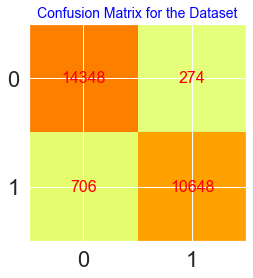

In [22]:
# plot in 2D the confusion matrix - FN, FP, TN, TP
w, h = conf_matrix.shape

plt.figure(figsize=(4,4))                  # figure size
plt.imshow(conf_matrix, cmap='Wistia')      # display data as an image
plt.title("Confusion Matrix for the Dataset", fontsize=14, color='blue')
plt.xticks(range(2))                      # set tick locations of the x-axis
plt.yticks(range(2))                      # set tick locations of y-axis

# loop thru the confusion matrix to print-out the values for each cell. 
for i in range(w):
    for j in range(h):
        plt.annotate(conf_matrix[i][j], xy=(j,i), horizontalalignment='center', verticalalignment='center', 
                     color='red', fontsize='16')

plt.show()

In [23]:
# for RandomizedSearchCV
# Number of trees in random forest
n_estimators = [1, 10, 100]
# Number of features to consider at every split
max_features = [2, 6, 10]
# Maximum number of levels in tree
max_depth = [2, 10, 20]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [24]:
# create a grid to list the combination of hyperparameter - RandomizedSearchCV
hyperparam_grid = {'n_estimators': n_estimators, 
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf
}

# scores: precision, recall, accuracy
scorers = {'precision_score': make_scorer(precision_score, average='macro'),
           'recall_score': make_scorer(recall_score, average='macro'),
           'accuracy_score': make_scorer(accuracy_score)
}

In [32]:
# function to get the scores according to different combinations
def search_score(model, typeCV, X_train, y_train, scorers, cv, refit='precision_score'):
    '''
        model: algorithm to be use for the classification
        typeCV: the cross-validation type
        X_train: features
        y_train: label
        scorers: type of scoring
        refit: estimator using best found parameters on dataset
        return the validation classifier performance matrics
    '''
    
    print('CV - {}'.format(typeCV))
    
    if typeCV == 'RandomizedSearchCV':
        cv_search = RandomizedSearchCV(estimator=model_rf, param_distributions=hyperparam_grid, n_iter=100, 
                                         verbose=3, random_state=1, n_jobs=-1, return_train_score=True, refit=refit,
                                         scoring=scorers, cv=cv)
    else:
        # GridSearchCV
        cv_search = GridSearchCV(estimator=model_rf, param_grid=grid_hyperparam_grid, verbose=3, n_jobs=-1, 
                                 return_train_score=True, refit=refit, scoring=scorers, cv=cv)
    
    # fit the data into the model
    bp = cv_search.fit(X_train, y_train)
    
    # print the best search hyperparameter
    print('Best parameters for {}'.format(refit))
    print(bp.best_params_)
    
    return cv_search

In [26]:
# create a random forest model
cv = 3 # 5-fold cross-validation ( default value)

# perform the RandomizedSearchCV - ~4 minutes execution!
result = search_score(model_rf, 'RandomizedSearchCV', X_train, y_train, scorers, cv, refit='accuracy_score')

CV - RandomizedSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


Best parameters for accuracy_score
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20}


In [27]:
# RandomizedSearchCV_results results in dataframe
RandomizedSearchCV_results = pd.DataFrame(result.cv_results_)

# sort values by mean_test_accuracy_score in descending order
RandomizedSearchCV_results = RandomizedSearchCV_results.sort_values(by='mean_test_accuracy_score', ascending=False)

# fill with zero some NaN values at the bottom because of multiple search criteria creating NaN 
RandomizedSearchCV_results = RandomizedSearchCV_results.fillna(0)

# only capture the necessary columns
RandomizedSearchCV_results_updated = RandomizedSearchCV_results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']].round(3)

In [29]:
RandomizedSearchCV_results_updated

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf
53,0.965,0.961,0.963,100,10,20,5,1
1,0.964,0.960,0.963,100,10,20,5,4
19,0.964,0.960,0.963,100,10,20,2,4
54,0.964,0.960,0.963,100,6,20,2,1
61,0.961,0.958,0.960,10,10,20,5,4
...,...,...,...,...,...,...,...,...
83,0.000,0.000,0.000,10,6,20,1,4
84,0.000,0.000,0.000,10,10,2,1,1
89,0.000,0.000,0.000,100,2,20,1,2
90,0.000,0.000,0.000,100,10,20,1,2


In [30]:
# for GridSearchCV - to reduce the execution time
# Number of trees in random forest
n_estimators = [1, 10, 100]
# Number of features to consider at every split
max_features = [2, 6, 10]
# Maximum number of levels in tree
max_depth = [2, 10, 50]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [31]:
# create a grid to list the combination of hyperparameter - for GridSearchCV to reduce the execution time
grid_hyperparam_grid = {'n_estimators': n_estimators, 
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf
}

# scores: precision, recall, accuracy
scorers = {'precision_score': make_scorer(precision_score, average='macro'),
           'recall_score': make_scorer(recall_score, average='macro'),
           'accuracy_score': make_scorer(accuracy_score)
}

In [33]:
# perform the GridSearchCV
cv = 3 # minimum value

# perform the GridSearchCV - ~8 minutes execution! (reduce the number of configuration above to reduce execution time)
result = search_score(model_rf, 'GridSearchCV', X_train, y_train, scorers, cv, refit='precision_score')

CV - GridSearchCV
Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 11.5min finished


Best parameters for precision_score
{'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [34]:
# GridSearchCV_results results in dataframe
GridSearchCV_results = pd.DataFrame(result.cv_results_)

# sort values by mean_test_accuracy_score in descending order
GridSearchCV_results = GridSearchCV_results.sort_values(by='mean_test_accuracy_score', ascending=False)

# fill with zero some NaN values at the bottom because of multiple search criteria creating NaN 
GridSearchCV_results = GridSearchCV_results.fillna(0)

# only capture the necessary columns
GridSearchCV_results_updated = GridSearchCV_results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']].round(3)

In [35]:
GridSearchCV_results_updated

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf
224,0.965,0.961,0.964,100,10,50,5,1
233,0.965,0.961,0.964,100,10,50,5,2
230,0.965,0.961,0.963,100,10,50,2,2
221,0.965,0.961,0.963,100,10,50,2,1
242,0.965,0.961,0.963,100,10,50,5,4
...,...,...,...,...,...,...,...,...
226,0.000,0.000,0.000,10,10,50,1,2
227,0.000,0.000,0.000,100,10,50,1,2
234,0.000,0.000,0.000,1,10,50,1,4
235,0.000,0.000,0.000,10,10,50,1,4


In [36]:
# Comparing scores: baseline, RandomizedSearchCV, GridSearchCV
base_random_forest_model = RandomForestClassifier(n_estimators=10, random_state=1) # default values
base_random_forest_model.fit(X_train, y_train)
base_accuracy = base_random_forest_model.score(X_test, y_test)

# about 1%+ difference between baseline versus RandomizedSearchCV/GridSearchCV
print("Baseline Accuracy = {:0.2f}%".format(base_accuracy*100))
print("Best RandomizedSearchCV Accuracy = {:0.2f}%".format(RandomizedSearchCV_results_updated['mean_test_accuracy_score'].max()*100))
print("Best GridSearchCV Accuracy = {:0.2f}%".format(GridSearchCV_results_updated['mean_test_accuracy_score'].max()*100))

Baseline Accuracy = 95.73%
Best RandomizedSearchCV Accuracy = 96.30%
Best GridSearchCV Accuracy = 96.40%
